Linh Vu
 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [4]:
np.random.seed(1)
bias = 20*np.random.randn()

X, y, coef = make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=30, 
                                   bias = bias, 
                                   random_state=1, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408,28.865495
1,-2.301539,1.744812,-0.761207,0.319039,-0.249370,4.937580
2,1.462108,-2.060141,-0.322417,-0.384054,1.133769,-39.935140
3,-1.099891,-0.172428,-0.877858,0.042214,0.582815,-49.524568
4,-1.100619,1.144724,0.901591,0.502494,0.900856,244.382026
...,...,...,...,...,...,...
295,-0.081570,1.529248,0.686483,1.717089,-0.804277,343.244347
296,0.300254,-0.429596,0.805913,-0.219552,-0.251852,20.913333
297,-1.326490,0.308204,1.115489,1.008196,-3.016032,-8.753043
298,-1.619646,2.005141,-0.187626,-0.148941,1.165335,182.614426


In [5]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

#create and fit linear model
model = LinearRegression()
model.fit(X_train, y_train)

#predict on train and test set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

R2_train = model.score(X_train, y_train)
R2_test = model.score(X_test, y_test)

#calculate MSE
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print("Intercept (bias):", model.intercept_)
print("Coefficients:", model.coef_)
print_model(model.intercept_, model.coef_, column_names, model_name="Linear Regression Model")
print("Training Set: R^2 =", R2_train, ", MSE =", MSE_train)
print("Test Set:     R^2 =", R2_test, ", MSE =", MSE_test)


Intercept (bias): 34.54353080429699
Coefficients: [43.01982633 78.191327   90.23161681 86.00466389 67.15251811]
Linear Regression Model:
 y = 34.54 + 43.02*x1 + 78.19*x2 + 90.23*x3 + 86.00*x4 + 67.15*x5
Training Set: R^2 = 0.9645462827246978 , MSE = 945.2804257768416
Test Set:     R^2 = 0.9724850461897596 , MSE = 845.65971969546


#### Your written answers here

What are your model parameters?
 - Intercept (bias): Approximately 34.54
Coefficients:
x1: 43.02
x2: 78.19
x3: 90.23
x4: 86.00
x5: 67.15

What were your MSE and R^2?
 - Training Set: R^2 = 0.9645, MSE = 945.28
 - Test Set: R^2 = 0.9725, MSE = 845.66



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [6]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


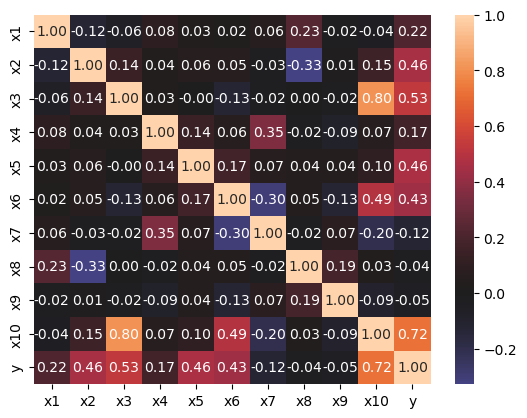

In [7]:
corr = reg2_df.corr() #calculate correlation of dataframe/matrix
sns.heatmap(corr, annot=True, center=0, fmt='.2f') #plot heatmap
plt.show()

In [8]:
#candidate_idx = [0, 1, 2, 3, 4, 5,9]
#candidate_idx = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
candidate_idx = [0, 1, 3, 4, 9]
Z= X[:,candidate_idx] #select columns from x
Z_names = [column_names[i] for i in candidate_idx] #select column names

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2)

model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)

R2_train = model_LR.score(Z_train, y_train)
R2_test = model_LR.score(Z_test, y_test)

y_pred_train = model_LR.predict(Z_train)
y_pred_test = model_LR.predict(Z_test)
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

In [9]:
print(R2_train, R2_test)
print(MSE_train, MSE_test)
print_model(bias, coef, column_names, model_name = 'True Model')
print_model(model_LR.intercept_, model_LR.coef_, Z_names, model_name = 'Fit Model')

0.8636997804240224 0.8880496972897264
10.0053758030971 7.704509185613704
True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6
Fit Model:
 y = -15.37 + 59.04*x1 + 76.39*x2 + 9.96*x4 + 57.26*x5 + 179.47*x10


#### Your written answers here

What are your model parameters?
 1. True model: 
 a. Intercept: -15.62
 b. Coefficients: 
 x1= 55.43
 x2=77.93
 x3=94.15
 x4=16.29
 x5= 57.11
 x6=79.90

 2. Fit Model: 
  a. Intercept: -15.37
 b. Coefficients: 
 x1= 59.04
 x2=76.39
 x3=94.15
 x4=9.96
 x5= 57.26
 x6=179.47

Which features (x1, x2...) were significant? Which were co-linear?
 Significant: x2, x3, x5, x7, x8, x10
 Co-linear: x3, x5, x7, x, x10
 
What were your MSE and R^2?
 - Training: MSE = 10.0053758030971 , R^2 = 0.8636997804240224
 - Test: MSE = 7.704509185613704, R^2 = 0.8880496972897264



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [3]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


In [4]:
print(housing_df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


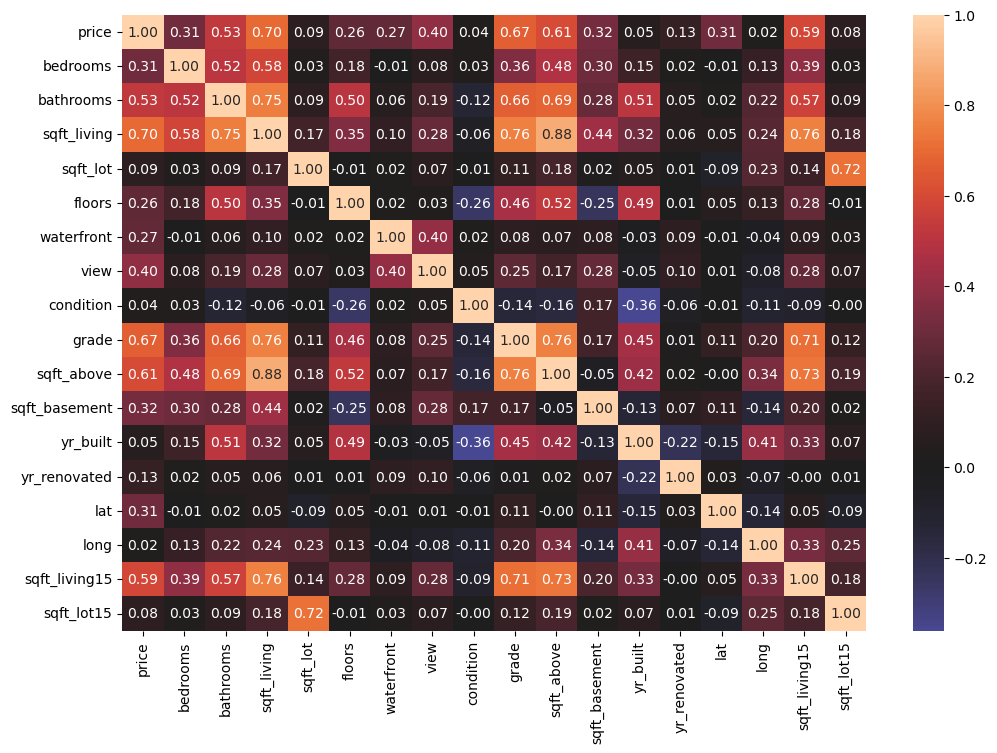

In [5]:
#drop columns id,date and zipcode
housing_df = housing_df.drop(columns=['id', 'date', 'zipcode'])
housing_corr = housing_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(housing_corr, annot=True, center=0, fmt='.2f') #plot heatmap
plt.show()

#### Your written answers here
Which features are you using and why?
 
We will use sqrt_foot living, bathroom, and grades as they are the feature that have a high correlation with the target (price) while not being highly correlated with each other.

Training R^2: 0.5355275927892593
Test R^2: 0.5420532452871354
Training MSE: 60682676128.30012
Test MSE: 69230884766.188


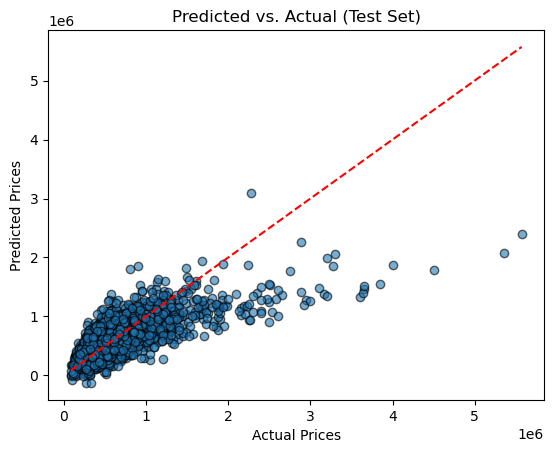

In [12]:
from sklearn.preprocessing import StandardScaler
X = housing_df[['sqft_living', 'bathrooms', 'grade']]
y = housing_df['price']

#split data: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model on the training set
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluate on the test set
R2_train = model.score(X_train_scaled, y_train)
R2_test = model.score(X_test_scaled, y_test)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print("Training R^2:", R2_train)
print("Test R^2:", R2_test)
print("Training MSE:", MSE_train)
print("Test MSE:", MSE_test)

# Plot predicted vs actual on the test set
y_pred = model.predict(X_test_scaled)
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual (Test Set)")
plt.show()



### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

Training R^2: 0.6950902268529335
Test R^2: 0.6956021335696088
Top 3 features by absolute coefficient values: ['lat', 'sqft_living', 'grade']
Their coefficients: [ 76862.32685627  78887.9351348  110726.98718935]


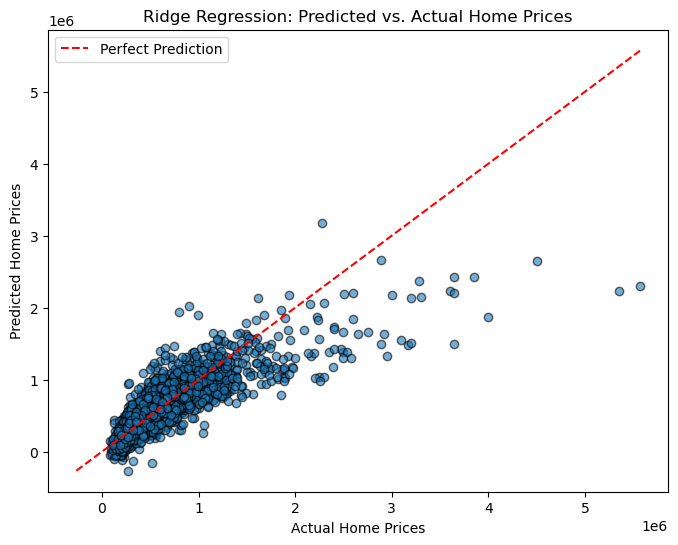

In [11]:
from sklearn.linear_model import Ridge
X = housing_df.drop(columns=['price'])
y = housing_df['price']
feature_names = X.columns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Ridge Regression: 
alpha_value = 100  
model = Ridge(alpha=alpha_value)
model.fit(X_train_scaled, y_train)

R2_train = model.score(X_train_scaled, y_train)
R2_test = model.score(X_test_scaled, y_test)
print("Training R^2:", R2_train)
print("Test R^2:", R2_test)

#coefficients: 
coefs = model.coef_
top3_indices = np.argsort(np.abs(coefs))[-3:]
top3_features = feature_names[top3_indices]
print("Top 3 features by absolute coefficient values:", top3_features.tolist())
print("Their coefficients:", coefs[top3_indices])

#plot
y_pred = model.predict(X_test_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.xlabel("Actual Home Prices")
plt.ylabel("Predicted Home Prices")
plt.title("Ridge Regression: Predicted vs. Actual Home Prices")
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Perfect Prediction")
plt.legend()
plt.show()


### Your written answers here
Which regression did you use?
 - I used Ridge regression

Does your regularized model look better than your MLR? How so?
 - Ridge performs better since its R^2 is higher. 
 

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [15]:
# Split the Data by Price
df_below_1m = housing_df[housing_df['price'] < 1_000_000].copy()
df_above_1m = housing_df[housing_df['price'] >= 1_000_000].copy()

X_below = df_below_1m.drop(columns=['price'])
y_below = df_below_1m['price']

X_above = df_above_1m.drop(columns=['price'])
y_above = df_above_1m['price']

#split training/testing: 
X_below_train, X_below_test, y_below_train, y_below_test = train_test_split(
    X_below, y_below, test_size=0.2, random_state=42
)

X_above_train, X_above_test, y_above_train, y_above_test = train_test_split(
    X_above, y_above, test_size=0.2, random_state=42
)

#scale
scaler_below = StandardScaler()
X_below_train_scaled = scaler_below.fit_transform(X_below_train)
X_below_test_scaled = scaler_below.transform(X_below_test)

scaler_above = StandardScaler()
X_above_train_scaled = scaler_above.fit_transform(X_above_train)
X_above_test_scaled = scaler_above.transform(X_above_test)

#ridge
alpha_value = 100

model_below = Ridge(alpha=alpha_value)
model_below.fit(X_below_train_scaled, y_below_train)

model_above = Ridge(alpha=alpha_value)
model_above.fit(X_above_train_scaled, y_above_train)

# Predictions
y_below_pred = model_below.predict(X_below_test_scaled)
y_above_pred = model_above.predict(X_above_test_scaled)

# R^2 Scores
r2_below = model_below.score(X_below_test_scaled, y_below_test)
r2_above = model_above.score(X_above_test_scaled, y_above_test)

# MSE
mse_below = mean_squared_error(y_below_test, y_below_pred)
mse_above = mean_squared_error(y_above_test, y_above_pred)

print(f"--- Below $1M Subset ---")
print(f"R^2: {r2_below:.3f}")
print(f"MSE: {mse_below:.2f}")

print(f"\n--- Above/Equal $1M Subset ---")
print(f"R^2: {r2_above:.3f}")
print(f"MSE: {mse_above:.2f}")


--- Below $1M Subset ---
R^2: 0.686
MSE: 11713494924.40

--- Above/Equal $1M Subset ---
R^2: 0.537
MSE: 266017340641.66


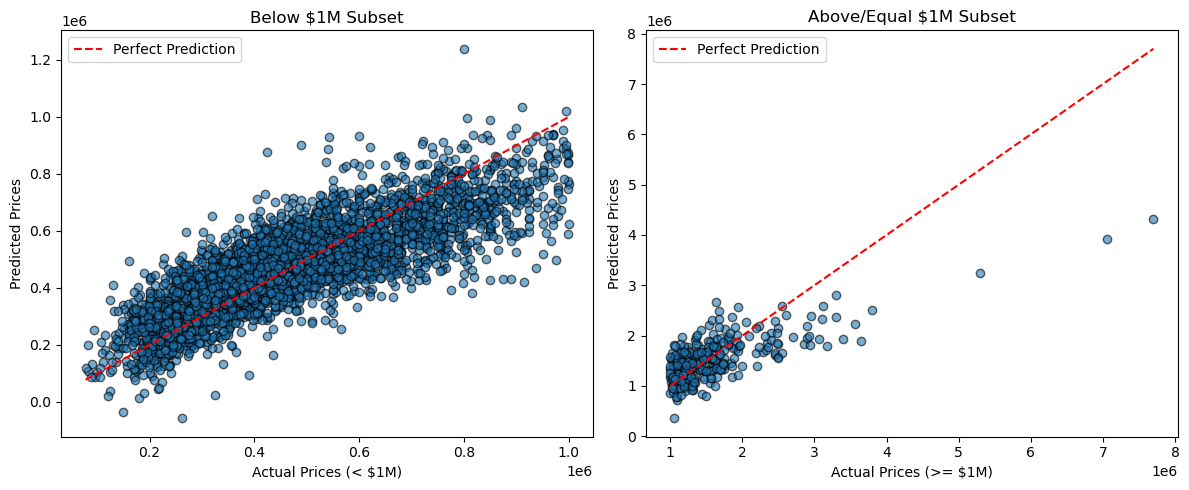

In [16]:
plt.figure(figsize=(12, 5))

# Plot for below $1M
plt.subplot(1, 2, 1)
plt.scatter(y_below_test, y_below_pred, alpha=0.6, edgecolors='k')
plt.plot(
    [y_below_test.min(), y_below_test.max()],
    [y_below_test.min(), y_below_test.max()],
    'r--', label="Perfect Prediction"
)
plt.xlabel("Actual Prices (< $1M)")
plt.ylabel("Predicted Prices")
plt.title("Below $1M Subset")
plt.legend()

# Plot for above/equal $1M
plt.subplot(1, 2, 2)
plt.scatter(y_above_test, y_above_pred, alpha=0.6, edgecolors='k')
plt.plot(
    [y_above_test.min(), y_above_test.max()],
    [y_above_test.min(), y_above_test.max()],
    'r--', label="Perfect Prediction"
)
plt.xlabel("Actual Prices (>= $1M)")
plt.ylabel("Predicted Prices")
plt.title("Above/Equal $1M Subset")
plt.legend()

plt.tight_layout()
plt.show()

 ### Your written answers here

 What are the $R^2$ for the two models?

  - --- Below $1M Subset ---
R^2: 0.686
MSE: 11713494924.40

--- Above/Equal $1M Subset ---
R^2: 0.537
MSE: 266017340641.66
 
